In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [11]:
data=pd.read_csv('heartt.csv')
data=pd.DataFrame(data=data)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [17]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0,1,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3,0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2,2,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0,0,0


In [18]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0,2,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2,2,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1,2,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1,0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,4,0,0


In [12]:
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          303 non-null int32
thal        303 non-null int32
num         303 non-null int64
dtypes: float64(11), int32(2), int64(1)
memory usage: 30.9 KB


In [20]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.716172,0.851485,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.005927,0.970282,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,3.000000,4.000000


In [13]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

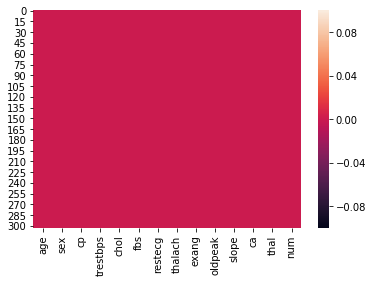

In [14]:
sns.heatmap(data.isnull())

In [21]:
data.shape

(303, 14)

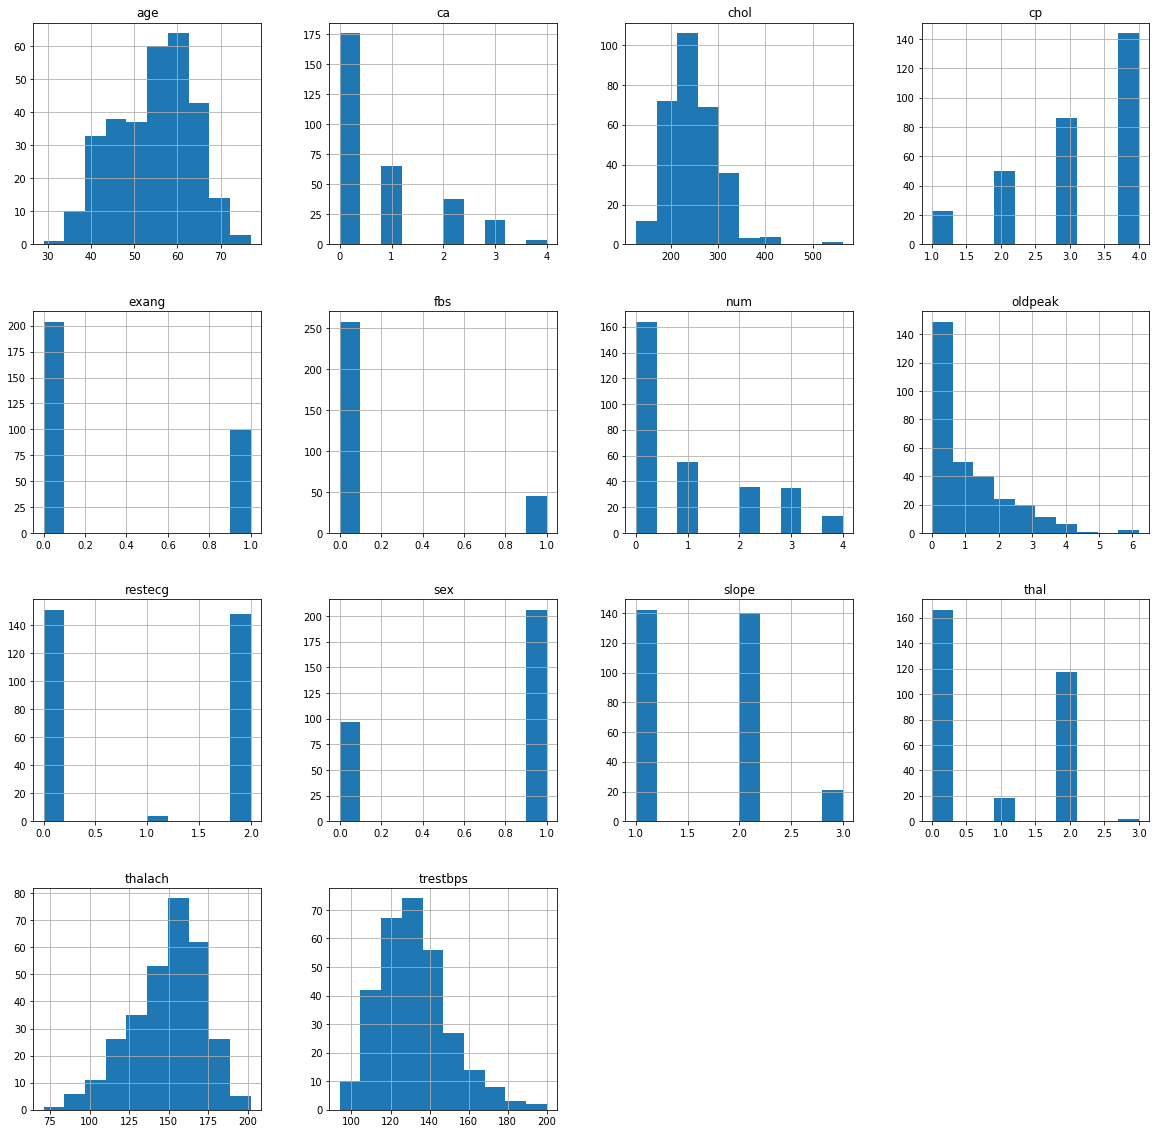

In [55]:
data.hist(figsize=(20,20))
plt.show()

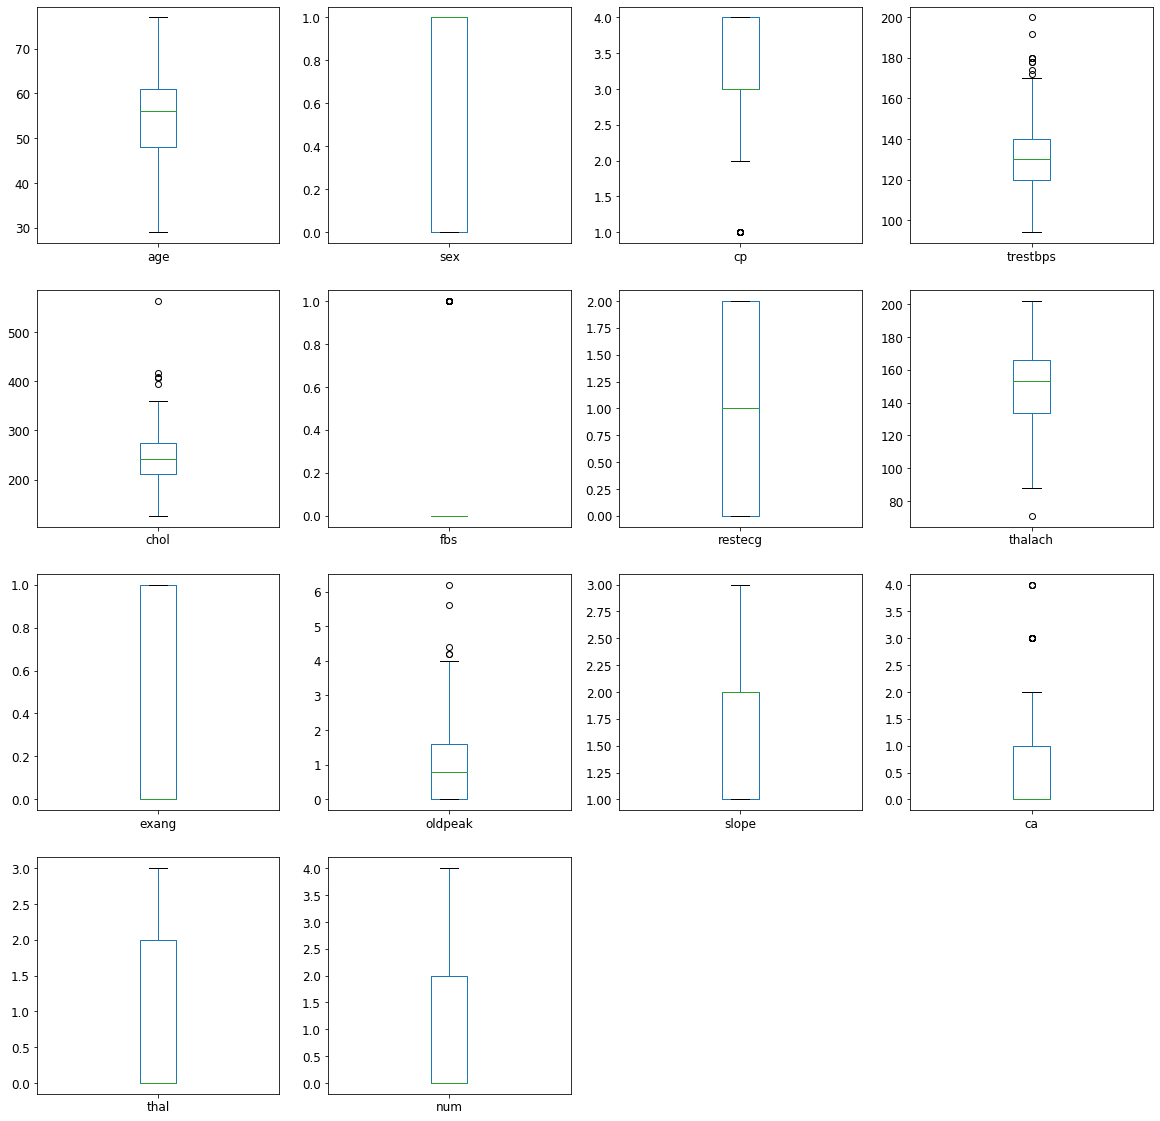

In [56]:
data.plot(kind='box', subplots=True, layout=(4,4), figsize=(20,20),fontsize=12)
plt.show()


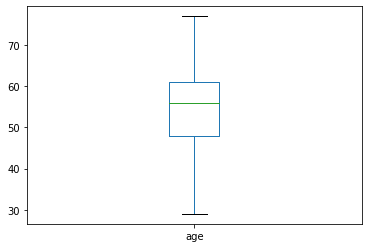

In [22]:
data['age'].plot.box()

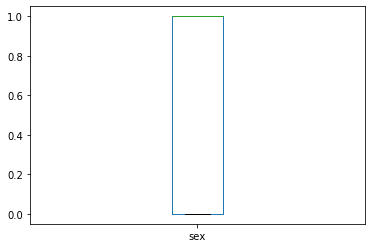

In [23]:
data['sex'].plot.box()

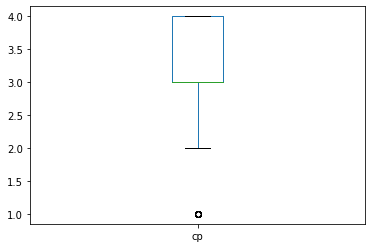

In [24]:
data['cp'].plot.box()

In [15]:
le=LabelEncoder()
list1=['ca','thal']
for val in list1:
    data[val]=le.fit_transform(data[val].astype(str))

In [16]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0,1,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3,0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2,2,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0,0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0,0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2,0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0,0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1,2,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0,2,1


In [25]:
x=data.iloc[:,0:14]
y=data.iloc[:,-1]

In [26]:
x.shape

(303, 14)

In [27]:
y.shape

(303,)

In [28]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=0)

In [29]:
train_x.shape

(227, 14)

In [30]:
test_x.shape

(76, 14)

In [31]:
train_y.shape

(227,)

In [32]:
test_y.shape

(76,)

In [33]:
lg=LogisticRegression()

In [34]:
lg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
pred=lg.predict(test_x)
print(pred)

[0 0 3 0 3 2 1 1 3 0 0 0 0 3 0 0 3 0 0 0 0 0 0 4 0 0 0 1 3 1 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 4 0 0 0 0 0 3 0 0 2 0 0 3 1 3 0 2 1 3 0 0 0 0 1
 1 0]


In [36]:
print("accuracy score:",accuracy_score(pred,test_y))

accuracy score: 0.75


In [37]:
print(confusion_matrix(test_y,pred))

[[40  0  0  0  0]
 [10  6  0  0  0]
 [ 0  5  3  2  0]
 [ 0  0  0  6  0]
 [ 0  0  0  2  2]]


In [38]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        40
           1       0.55      0.38      0.44        16
           2       1.00      0.30      0.46        10
           3       0.60      1.00      0.75         6
           4       1.00      0.50      0.67         4

    accuracy                           0.75        76
   macro avg       0.79      0.64      0.64        76
weighted avg       0.77      0.75      0.72        76



In [39]:
mnb=MultinomialNB()
mnb.fit(train_x,train_y)
predmnb=mnb.predict(test_x)
print(accuracy_score(test_y,predmnb))
print(confusion_matrix(test_y,predmnb))
print(classification_report(test_y,predmnb))

0.6578947368421053
[[32  7  1  0  0]
 [ 4 10  2  0  0]
 [ 0  3  4  3  0]
 [ 0  0  2  4  0]
 [ 0  0  0  4  0]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        40
           1       0.50      0.62      0.56        16
           2       0.44      0.40      0.42        10
           3       0.36      0.67      0.47         6
           4       0.00      0.00      0.00         4

    accuracy                           0.66        76
   macro avg       0.44      0.50      0.46        76
weighted avg       0.66      0.66      0.65        76



In [40]:
svc=SVC(kernel='rbf')
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
print(accuracy_score(test_y,predmnb))
print(confusion_matrix(test_y,predmnb))
print(classification_report(test_y,predmnb))

0.6578947368421053
[[32  7  1  0  0]
 [ 4 10  2  0  0]
 [ 0  3  4  3  0]
 [ 0  0  2  4  0]
 [ 0  0  0  4  0]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        40
           1       0.50      0.62      0.56        16
           2       0.44      0.40      0.42        10
           3       0.36      0.67      0.47         6
           4       0.00      0.00      0.00         4

    accuracy                           0.66        76
   macro avg       0.44      0.50      0.46        76
weighted avg       0.66      0.66      0.65        76



In [41]:
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
preddtc=dtc.predict(test_x)
print(accuracy_score(test_y,preddtc))
print(confusion_matrix(test_y,preddtc))
print(classification_report(test_y,preddtc))

1.0
[[40  0  0  0  0]
 [ 0 16  0  0  0]
 [ 0  0 10  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  0  4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         4

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



In [42]:
dtc=KNeighborsClassifier()
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
preddtc=dtc.predict(test_x)
print(accuracy_score(test_y,preddtc))
print(confusion_matrix(test_y,preddtc))
print(classification_report(test_y,preddtc))

0.5131578947368421
[[36  2  1  1  0]
 [13  2  1  0  0]
 [ 6  3  1  0  0]
 [ 4  1  1  0  0]
 [ 3  1  0  0  0]]
              precision    recall  f1-score   support

           0       0.58      0.90      0.71        40
           1       0.22      0.12      0.16        16
           2       0.25      0.10      0.14        10
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         4

    accuracy                           0.51        76
   macro avg       0.21      0.23      0.20        76
weighted avg       0.39      0.51      0.42        76



In [43]:
y_pred_prob=lg.predict_proba(test_x)[:,1]
y_pred_prob

array([0.03577194, 0.24725475, 0.20253863, 0.20424355, 0.35268065,
       0.35450082, 0.54448817, 0.67908264, 0.20725366, 0.24570007,
       0.25353532, 0.08622056, 0.14389231, 0.24004681, 0.04946367,
       0.15839255, 0.12422597, 0.17433053, 0.05303929, 0.06063808,
       0.20025155, 0.09133138, 0.13072936, 0.02755556, 0.14399569,
       0.05188495, 0.2462439 , 0.53704973, 0.20500743, 0.60653315,
       0.14873325, 0.09056133, 0.09987326, 0.51916703, 0.52334984,
       0.09221837, 0.10616921, 0.17836055, 0.20463328, 0.07243702,
       0.05054603, 0.17451418, 0.19369474, 0.11501084, 0.11101151,
       0.22402756, 0.04929234, 0.42078985, 0.35079888, 0.12924588,
       0.0253969 , 0.07355392, 0.16426693, 0.03691444, 0.05194155,
       0.07577381, 0.0672529 , 0.09271271, 0.07654466, 0.24263493,
       0.11013157, 0.16250408, 0.1813186 , 0.34687229, 0.10626376,
       0.245076  , 0.11489673, 0.34785669, 0.09835292, 0.31975612,
       0.12883375, 0.13048928, 0.07869802, 0.3467536 , 0.48567

In [44]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [45]:
rfr.score(train_x,train_y)

1.0

In [46]:
rfr=RandomForestRegressor(n_estimators=400,random_state=56)
rfr.fit(train_x,train_y)
rfr.score(train_x,train_y)

0.9999998555979644

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(train_x,train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [48]:
gbr=GradientBoostingRegressor(n_estimators=500,random_state=76)
gbr.fit(train_x,train_y)
gbr.score(train_x,train_y)

0.9999999405714705

In [49]:
mnb=MultinomialNB()
score=cross_val_score(mnb,x,y,cv=5)
print("Score:",score)
print("Mean scores",score.mean())
print("Std Deviation",score.std())
y_pred=cross_val_predict(mnb,x,y,cv=5)
print('Y prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

Score: [0.69354839 0.67213115 0.63934426 0.68333333 0.69491525]
Mean scores 0.6766544769006921
Std Deviation 0.020376358537829785
Y prediction values
[0 3 2 0 0 0 4 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 3 0 0 2 0 3 0 1 1 0 0 0 3
 2 2 0 3 0 0 0 1 1 0 3 2 0 0 0 1 0 1 2 1 1 0 1 2 0 3 0 3 3 1 0 3 1 0 1 2 1
 0 1 2 1 0 3 0 0 0 3 0 0 0 1 0 0 0 4 1 0 0 1 1 3 0 0 0 0 0 0 4 0 1 1 2 1 1
 1 0 2 2 0 0 0 2 3 2 2 0 4 1 0 3 2 0 0 0 0 0 0 0 0 4 2 1 0 0 1 0 2 1 0 3 0
 0 0 0 0 2 3 2 2 1 1 1 1 0 2 0 0 0 0 0 0 1 0 2 1 1 0 3 2 1 3 0 0 1 2 0 1 1
 0 0 3 1 3 0 2 2 2 1 2 0 0 0 1 0 0 0 1 0 2 2 3 0 1 0 1 0 3 1 0 0 0 2 0 0 0
 0 2 1 0 0 0 2 1 0 2 1 1 0 2 2 1 0 0 0 0 0 1 0 2 1 2 1 0 1 3 2 0 0 0 0 0 0
 1 0 2 0 0 4 2 1 3 0 0 1 1 2 0 1 0 0 0 1 0 2 0 3 0 1 2 3 1 0 0 1 0 1 4 1 0
 3 1 1 4 4 0 0]


0.6765676567656765

In [50]:
dtc=DecisionTreeClassifier()
score=cross_val_score(dtc,x,y,cv=8,scoring='f1_macro')
print('F1-score:',score)
print('Mean Scores',score.mean())
print('standard deviation',score.std())
y_pred=cross_val_predict(mnb,x,y,cv=8)
print('Y prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

F1-score: [1. 1. 1. 1. 1. 1. 1. 1.]
Mean Scores 1.0
standard deviation 0.0
Y prediction values
[0 3 2 0 0 0 4 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 3 0 0 2 0 3 0 1 1 0 0 0 3
 2 2 0 3 0 0 0 1 1 0 3 2 0 0 0 1 0 1 2 1 1 0 1 2 0 3 0 2 3 1 0 3 1 0 2 2 1
 0 1 2 1 0 3 0 0 0 3 0 0 0 1 0 0 0 4 1 0 0 1 1 3 0 0 0 0 0 0 4 0 1 1 2 1 1
 1 0 2 2 0 0 0 2 3 2 2 0 3 1 0 3 2 0 0 0 0 0 0 0 0 3 2 1 0 0 1 0 2 0 0 3 0
 0 0 0 0 2 3 2 2 1 1 1 1 0 2 0 0 0 0 0 0 1 0 3 1 1 2 3 2 1 3 0 0 1 2 0 1 1
 0 0 3 1 3 0 2 2 2 1 2 0 0 0 1 0 0 0 1 0 2 3 3 0 1 0 1 0 3 0 0 0 0 2 0 0 0
 0 2 1 0 0 0 3 1 0 2 1 1 0 2 2 1 0 0 0 0 0 1 0 2 1 2 1 0 1 3 2 0 0 0 0 0 0
 1 0 2 0 0 3 2 1 2 0 0 1 1 2 0 1 0 0 0 1 0 2 0 3 0 1 2 4 1 0 0 1 0 1 4 1 0
 4 1 1 4 4 0 0]


array([[143,  15,   6,   0,   0],
       [  5,  37,  10,   3,   0],
       [  0,  13,  14,   6,   3],
       [  0,   4,  13,  13,   5],
       [  0,   2,   3,   8,   0]], dtype=int64)

In [51]:
knn=KNeighborsClassifier()
score=cross_val_score(knn,x,y,cv=8,scoring='accuracy')
print("Accuracy Score:",score)
print("Mean scores",score.mean())
print("Std Deviation",score.std())
y_pred=cross_val_predict(knn,x,y,cv=10)
print('Y prediction values')
print(y_pred)
print("y_pred.shape",y_pred.shape)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

Accuracy Score: [0.525      0.475      0.55       0.53846154 0.40540541 0.5
 0.44444444 0.54285714]
Mean scores 0.4976460663960664
Std Deviation 0.04880606223489846
Y prediction values
[0 3 2 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 2 2 0 0 0 1 0 0 1 3 1 0 0 0 2 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0
 0 0 1 3 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 2 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 2 1 3 0 0 0 0 0 1 0 1 0
 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 2 0 0 0 0 0 1 1 0 0 0 1 2 0 0 0 0 0 0 0 1 0
 0 0 0 0 2 0 2 0 3 0 0 0 0 0 3 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 3 0 0 0 1 0 0 0 3 1 0 1 0 1 3 0 1 0 0 0 0 4 0
 0 1 0 0 0 0 2 0 0 0 0 4 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 4 0 0]
y_pred.shape (303,)


array([[141,  14,   2,   6,   1],
       [ 42,   5,   4,   3,   1],
       [ 23,   7,   3,   3,   0],
       [ 23,   8,   3,   0,   1],
       [  7,   4,   2,   0,   0]], dtype=int64)

In [54]:
sv=SVC()
score=cross_val_score(sv,x,y,cv=10,scoring='accuracy')
print("Accuracy Score:",score)
print("Mean scores",score.mean())
print("Std Deviation",score.std())
y_pred=cross_val_predict(knn,x,y,cv=50)
print('Y prediction values')
print(y_pred)
print("y_pred.shape",y_pred.shape)
conf_mat=confusion_matrix(y,y_pred)
conf_mat
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

Accuracy Score: [0.51515152 0.51515152 0.51515152 0.53125    0.51612903 0.55172414
 0.57142857 0.57142857 0.57142857 0.57142857]
Mean scores 0.543027200135793
Std Deviation 0.025486395607265455
Y prediction values
[0 1 2 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 3
 2 2 0 0 0 1 0 0 1 3 1 0 0 0 2 0 0 1 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 3 0
 0 0 2 3 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 2 1 0 0 0 3 1 0 0 0 0 0 0 4 0 0 0 1 0 0 0 0 0 2 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 2 0 0 0 0 0 0 0 1 0
 0 0 0 0 2 0 2 0 3 0 0 0 0 0 3 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 3 0 0 0 1 0 0 0 3 1 0 1 0 1 3 0 1 0 0 0 0 4 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0]
y_pred.shape (303,)


0.49504950495049505